In [266]:
import numpy as np
import matplotlib.pyplot as plt

In [267]:
X, y, w_true = sklearn.datasets.make_regression(n_features=5, n_samples=50, coef=True, noise=0.2)


In [268]:
def mserror(X, w, y_pred):
    y_pred = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [269]:
def gradientDescent(l1=0, l2=0):
    n_features = X.shape[1]
    count = len(X)
    
    # возьмем нулевые начальные веса
    w = np.zeros(n_features)

    # список значений ошибок после каждой итерации
    errors = []

    max_iter = 1e4

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8
    
    # шаг градиентного спуска
    eta = 0.5
    
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    
    
    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        iter_num += 1
        
        new_w = w - (2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / count + l1 * 2 * np.abs(w) + l2 * 2 * w**2)
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        errors.append(mserror(X, new_w, np.dot(X, new_w)))
        w = new_w
    
#     print(w)
#     print(w_true)
    
    return errors

In [270]:
def stochasticGradientDescent(l1=0, l2=0):
    n_features = X.shape[1]
    count = len(X)
    
    # возьмем нулевые начальные веса
    w = np.zeros(n_features)

    # список значений ошибок после каждой итерации
    errors = []

    max_iter = 1e4

    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8
    
    # шаг градиентного спуска
    eta = 0.5
    
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf

    # счетчик итераций
    iter_num = 0

    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
        iter_num += 1
        
        train_ind = np.random.randint(count)
        
        new_w = w - (2 * eta * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / count + l1 * 2 * np.abs(w) + l2 * 2 * w**2) 
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        errors.append(mserror(X, new_w, np.dot(X, new_w)))
        w = new_w
    
#     print(w)
#     print(w_true)
    
    return errors

In [271]:
gd_errors  = gradientDescent()
sgd_errors = stochasticGradientDescent()

gd_errorsl1  = gradientDescent(l1=0.01)
sgd_errorsl1 = stochasticGradientDescent(l1=0.01)

# ВЫВАЛИВАЕТСЯ С ОШИБКОЙ, ТАК И НЕ ПОНЯЛ, КАК ПОБОРОТЬ
# gd_errorsl2  = gradientDescent(l2=0.01)
# sgd_errorsl2 = stochasticGradientDescent(l2=0.01)

Text(0, 0.5, 'MSE')

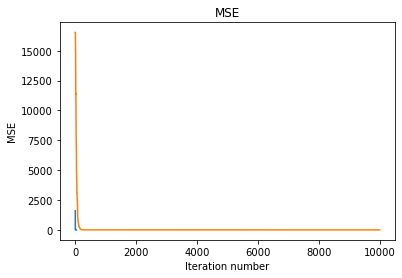

In [272]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(gd_errors)), gd_errors)
plt.plot(range(len(sgd_errors)), sgd_errors)

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

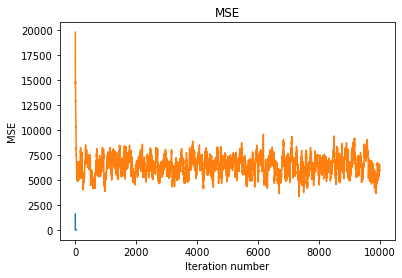

In [273]:
plt.plot(range(len(gd_errorsl1)), gd_errorsl1)
plt.plot(range(len(sgd_errorsl1)), sgd_errorsl1)

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')